### 문제1 - 월별 미세먼지 농도 변화 추이가 어떤지 궁금하다. 2020년은 코로나로 인해 미세먼지가 줄어들었고, 2021년은 아직 끝나지 않았기 때문에 2019년 데이터를 도태로 분석해보았다.
### 문제2 - 누적 미세먼지 양이 가장 많은 구가 어느 곳인지 궁금하다.

In [11]:
import os
import requests
import urllib
from src import mylib
import json
import io
#http://openapi.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190101

#keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)
KEY=key['dataseoul']

TYPE='json'
SERVICE='DailyAverageAirQuality'
START_INDEX=str(1)
END_INDEX=str(50)

for i in range(1,13):
    if i==1 or i==3 or i==5 or i==7 or i==8 or i==10 or i==12:
        for j in range(1,32):
            
            if i<10:
                if j<10:
                     MSRDT_DE='2019'+'0'+str(i)+'0'+str(j)
                else:
                    MSRDT_DE='2019'+'0'+str(i)+str(j)
            else:
                if j<10:
                    MSRDT_DE='2019'+str(i)+'0'+str(j)
                else:
                    MSRDT_DE='2019'+str(i)+str(j)
            

            params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,MSRDT_DE])
            _url='http://openAPI.seoul.go.kr:8088'
            url="/".join([_url,params])
            print(url)
            
            r=requests.get(url)
            trade=r.json()
            
            with io.open('src/ds_homework9_data.json', 'a', encoding='utf8') as json_file:
                _j=json.dump(trade, json_file, ensure_ascii=False)
                json_file.write(str(_j)+"\n")
                
    elif i==4 or i==6 or i==9 or i==11:
        for j in range(1,31):

            if i<10:
                if j<10:
                     MSRDT_DE='2019'+'0'+str(i)+'0'+str(j)
                else:
                    MSRDT_DE='2019'+'0'+str(i)+str(j)
            else:
                if j<10:
                    MSRDT_DE='2019'+str(i)+'0'+str(j)
                else:
                    MSRDT_DE='2019'+str(i)+str(j)
            
            params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,MSRDT_DE])
            _url='http://openAPI.seoul.go.kr:8088'
            url="/".join([_url,params])
            
            print(url)
            r=requests.get(url)
            trade=r.json()
            
            with io.open('src/ds_homework9_data.json', 'a', encoding='utf8') as json_file:
                _j=json.dump(trade, json_file, ensure_ascii=False)
                json_file.write(str(_j)+"\n")
                
    else:
        for j in range(1,29):

            if i<10:
                if j<10:
                     MSRDT_DE='2019'+'0'+str(i)+'0'+str(j)
                else:
                    MSRDT_DE='2019'+'0'+str(i)+str(j)
            else:
                if j<10:
                    MSRDT_DE='2019'+str(i)+'0'+str(j)
                else:
                    MSRDT_DE='2019'+str(i)+str(j)
            
            params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,MSRDT_DE])
            _url='http://openAPI.seoul.go.kr:8088'
            url="/".join([_url,params])
            
            print(url)
            r=requests.get(url)
            trade=r.json()
        
            with io.open('src/ds_homework9_data.json', 'a', encoding='utf8') as json_file:
                _j=json.dump(trade, json_file, ensure_ascii=False)
                json_file.write(str(_j)+"\n")

http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190101
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190102
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190103
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190104
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190105
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190106
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190107
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190108
http://openAPI.seoul.go.kr:8088/6f4579784d6b647739305841767874/json/DailyAverageAirQuality/1/50/20190109
http://openAPI.seoul.go.kr:8088/6f4579784d6b64773930584

In [2]:
import os
import pyspark

os.environ["PYSPARK_PYTHON"]="C:\\Anaconda3\\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"]="C:\\Anaconda3\\python.exe"

myConf=pyspark.SparkConf()
#myConf=pyspark.SparkConf().set("spark.driver.bindAddress", "127.0 .0.1")
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [3]:
jfile= os.path.join('src','ds_homework9_data.json')
hwDf= spark.read.json(jfile)

temp = hwDf.take(365)
a=[]

for i in range(len(temp)):
    a = a + temp[i]['DailyAverageAirQuality']['row']

temp_ = spark.createDataFrame(a)

In [4]:
temp_.show(17173)

+---+--------+------------+-----+-----+-----+-----+-----+
| CO|MSRDT_DE|   MSRSTE_NM|  NO2|   O3| PM10| PM25|  SO2|
+---+--------+------------+-----+-----+-----+-----+-----+
|0.6|20190101|      강남구|0.028|0.012| 37.0| 31.0|0.005|
|0.9|20190101|    강남대로|0.041| 0.01| 40.0| 28.0|0.004|
|0.8|20190101|      강동구| 0.04| 0.01| 43.0| 32.0|0.005|
|0.5|20190101|    강변북로|0.048|0.009| 45.0| 27.0|0.005|
|0.6|20190101|      강북구|0.026|0.019| 46.0| 29.0|0.003|
|0.6|20190101|      강서구| 0.03|0.017| 47.0| 25.0|0.005|
|0.7|20190101|    공항대로|0.034|0.012| 44.0| 29.0|0.005|
|0.5|20190101|      관악구|0.036|0.016| 41.0| 29.0|0.005|
|0.0|20190101|      관악산|0.011|0.024| 31.0| 18.0|0.004|
|1.1|20190101|      광진구|0.036| 0.01| 37.0| 26.0|0.004|
|0.4|20190101|      구로구|0.028|0.016| 34.0| 18.0|0.006|
|0.6|20190101|        궁동| 0.03| 0.03| 30.0| 22.0|0.004|
|0.6|20190101|      금천구|0.034|0.014| 34.0| 25.0|0.004|
|1.1|20190101|        남산|0.032|0.019| 37.0| 22.0|0.005|
|0.7|20190101|      노원구|0.033|0.013| 44.0| 32.0|0.005|
|1

In [5]:
data = temp_.withColumn("month", temp_['MSRDT_DE'].substr(5,2))
data1 = data.groupBy("month").agg({"PM10":"sum"}).orderBy("month")

data1.show()

+-----+---------+
|month|sum(PM10)|
+-----+---------+
|   01|  93156.0|
|   02|  73048.0|
|   03|  82380.0|
|   04|  58188.0|
|   05|  77208.0|
|   06|  41752.0|
|   07|  37610.0|
|   08|  39680.0|
|   09|  31091.0|
|   10|  45316.0|
|   11|  57008.0|
|   12|  60799.0|
+-----+---------+



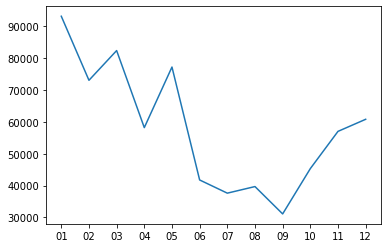

In [6]:
import numpy as np
import matplotlib.pyplot as plt

month = data1.rdd.map(lambda fields:fields[0]).collect()
data1_ = data1.rdd.map(lambda fields:fields[1]).collect()

plt.plot(np.array(month), np.array(data1_))
#plt.legend(['2018', '2019'])
plt.show()

### 문제1 답 - 6~10월까진 대체로 낮은 편이고, 나머지 월은 비교적 높은 편이다. 미세먼지 농도는 겨울, 봄철이 가장 심한 것 같다.

In [7]:
data = temp_.withColumn("구", data['MSRSTE_NM'].like("%구").cast("string"))
data2 = data.rdd.filter(lambda x: x[8]=="true").toDF()
data2_ = data2.groupBy("MSRSTE_NM").agg({"PM10":"sum"}).orderBy("MSRSTE_NM")

data2_.show()

+---------+---------+
|MSRSTE_NM|sum(PM10)|
+---------+---------+
|   강남구|  14013.0|
|   강동구|  14904.0|
|   강북구|  16063.0|
|   강서구|  16455.0|
|   관악구|  14828.0|
|   광진구|  15004.0|
|   구로구|  14874.0|
|   금천구|  13635.0|
|   노원구|  14163.0|
|   도봉구|  13595.0|
| 동대문구|  12674.0|
|   동작구|  15525.0|
|   마포구|  15059.0|
| 서대문구|  14633.0|
|   서초구|  15530.0|
|   성동구|  15987.0|
|   성북구|  15695.0|
|   송파구|  14290.0|
|   양천구|  16995.0|
| 영등포구|  15747.0|
+---------+---------+
only showing top 20 rows



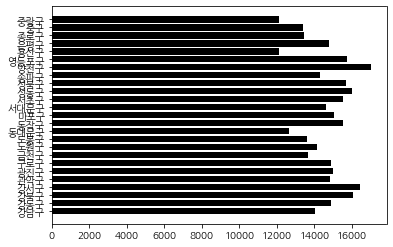

In [8]:
district = data2_.rdd.map(lambda fields:fields[0]).collect()
amount = data2_.rdd.map(lambda fields:fields[1]).collect()

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.barh(range(len(amount)), amount, color = 'black')
plt.yticks(range(len(amount)), district)
plt.show()

In [9]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, asc,desc

data2_.orderBy(F.col("sum(PM10)").desc()).take(1)

[Row(MSRSTE_NM='양천구', sum(PM10)=16995.0)]

### 문제2 답 - 서울시에서 연간 누적 미세먼지 양이 가장 많은 구는 양천구이다.